In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')



Imported all required Libraries

Data Ingestion:
In this project, Data is available in two csv file which have been imported using pandas.read_csv function and stored as df1 and df2 dataframe. Further to use data we have created a pandas data frame 'df' and vertically stacked these two data set (df1 and df2) in new dataset df. 

In [2]:
df1 = pd.read_csv('Data\coin_gecko_2022-03-16.csv')
df2 = pd.read_csv('Data\coin_gecko_2022-03-17.csv')
print(df1.shape,df2.shape)
df = np.vstack([df1,df2])
df = pd.DataFrame(data=df, columns= df1.columns)
df.head(5)

(500, 9) (500, 9)


,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date
0,Bitcoin,BTC,40859.46,0.022,0.03,0.055,35390763321.0,770991461396.0,2022-03-16
1,Ethereum,ETH,2744.41,0.024,0.034,0.065,19748695312.0,327104429349.0,2022-03-16
2,Tether,USDT,1.0,-0.001,-0.001,0.0,57934969077.0,79965155138.0,2022-03-16
3,BNB,BNB,383.43,0.018,0.028,0.004,1395853984.0,64043816800.0,2022-03-16
4,USD Coin,USDC,0.999874,-0.001,0.0,-0.0,3872273611.0,52222137400.0,2022-03-16


Some Columns are like index column like as 'coin' & 'symbol' so we need to drop these columns. 

In [3]:
df.drop(columns=['symbol','date','coin'],inplace=True)

In [4]:
col = df.columns
for i in col:
    df[i]=df[i].astype(float)

In [5]:
df.dtypes

price         float64
1h            float64
24h           float64
7d            float64
24h_volume    float64
mkt_cap       float64
dtype: object

Outlier Detection

In [6]:
def outlier (data_name):
    X=[]
    Y=[]
    Z=[]
    numeric_col = []
    non_numeric_col =[]
    Upper_limit ={}
    Lower_limit = {}
    outlier =[]
    no_outlier = []
    col = data_name.columns
    for i in col:
        if data_name[i].dtype!='O':
            numeric_col.append(str(i))
            per_25 = data_name[i].quantile(0.25)
            X.append(per_25)
            per_5 = data_name[i].quantile(0.5)
            Y.append(per_5)
            per_75 = data_name[i].quantile(0.75)
            Z.append(per_75)
            IQR = per_75 - per_25
            up_limit = per_75 + 1.5*IQR
            lo_limit = per_25 - 1.5*IQR
            Upper_limit[i]=up_limit
            Lower_limit[i]=lo_limit
            if data_name[i].max()>up_limit:
                outlier.append(i)
            elif data_name[i].min()<lo_limit:
                outlier.append(i)
            else:
                no_outlier.append(i)


        else:
            non_numeric_col.append(i)

    return outlier , no_outlier, Lower_limit, Upper_limit



In [7]:
out, no_out,  low_limit, upe_limit = outlier(df)

In [8]:
out

['price', '1h', '24h', '7d', '24h_volume', 'mkt_cap']

'price', '1h', '24h', '7d', '24h_volume', 'mkt_cap' columns have outlier which will be replaced with upper value and lower value of respective columns.

In [9]:
for i in (out):
    df[i] = df[i].clip(lower=low_limit[i], upper=upe_limit[i])


In [10]:
df['1h'] =df['1h'].fillna(df['1h'].median())
df['24h'] =df['24h'].fillna(df['24h'].median())
df['7d'] =df['7d'].fillna(df['7d'].median())
df['24h_volume'] =df['24h_volume'].fillna(df['24h_volume'].median())

Nan value of '1h','24h','7d', and '24h_volume' have been replaced by the median value of column.

In [11]:
df['variablity_score'] = df[['1h','24h','7d']].std(axis=1)
df['24h_mkt_cap_ratio'] = df['24h']/df['mkt_cap']
df['coin_number'] = df['mkt_cap']/df['price']
df.drop(columns=['24h_volume','mkt_cap'],inplace=True)

We have created 3 new columns i.e. 'variablity_score', '24h_mkt_cap_ratio', 'coin_number' using existing features for better prediction and we have droped two noisy columns i.e. '24h_volume','mkt_cap' 

In [12]:
df.describe()

,price,1h,24h,7d,variablity_score,24h_mkt_cap_ratio,coin_number
count,1.000000e+03,1000.000000,1000.000000,1000.00000,1000.000000,1.000000e+03,1.000000e+03
mean,4.889560e+00,0.010145,0.019978,0.00123,0.034490,1.084631e-10,7.683543e+14
std,6.821937e+00,0.013293,0.031105,0.07332,0.026725,2.559565e-10,8.900018e+15
min,1.484000e-09,-0.026000,-0.050000,-0.15800,0.000000,-7.330003e-10,3.851270e+06
25%,1.940547e-01,0.001000,0.001000,-0.04025,0.014572,2.284074e-12,6.774932e+07
50%,1.095000e+00,0.006000,0.016000,-0.00050,0.026851,4.045954e-11,2.120163e+08
75%,7.232500e+00,0.019000,0.035000,0.03600,0.049942,1.628896e-10,1.313443e+09
max,1.779017e+01,0.046000,0.086000,0.15400,0.130864,1.257004e-09,1.589759e+17


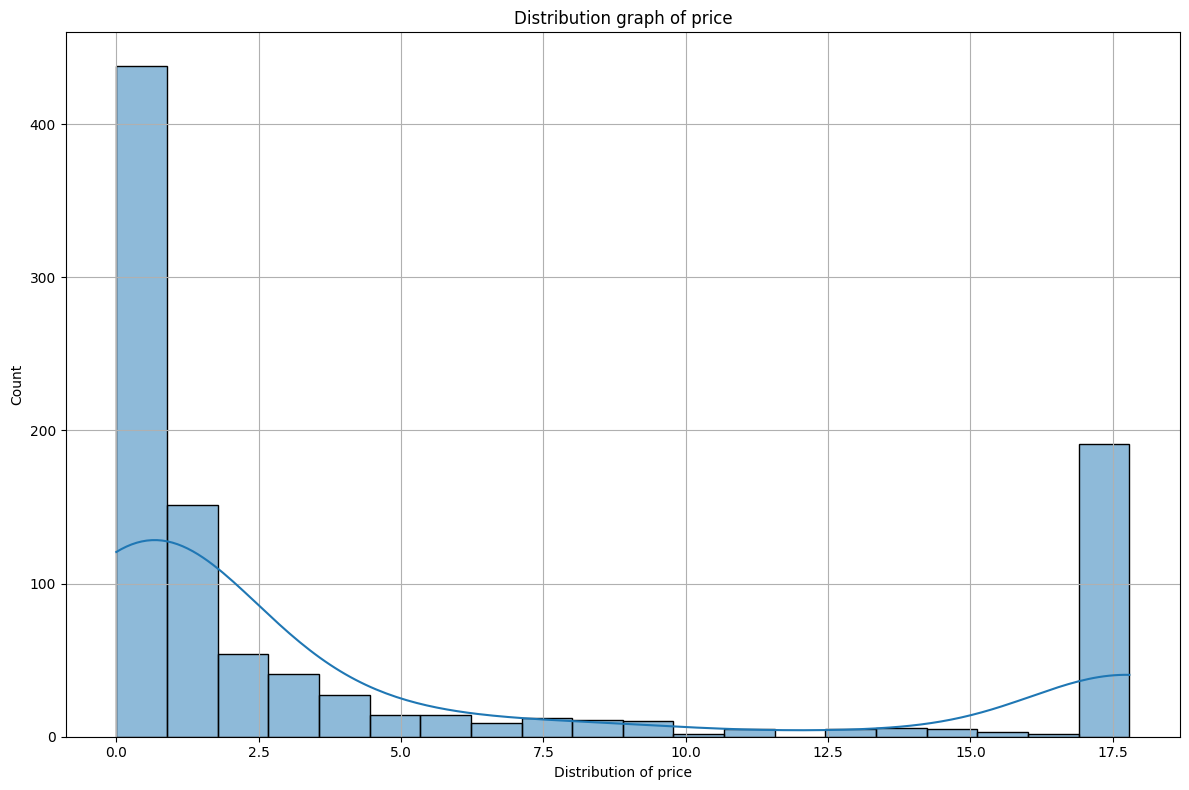

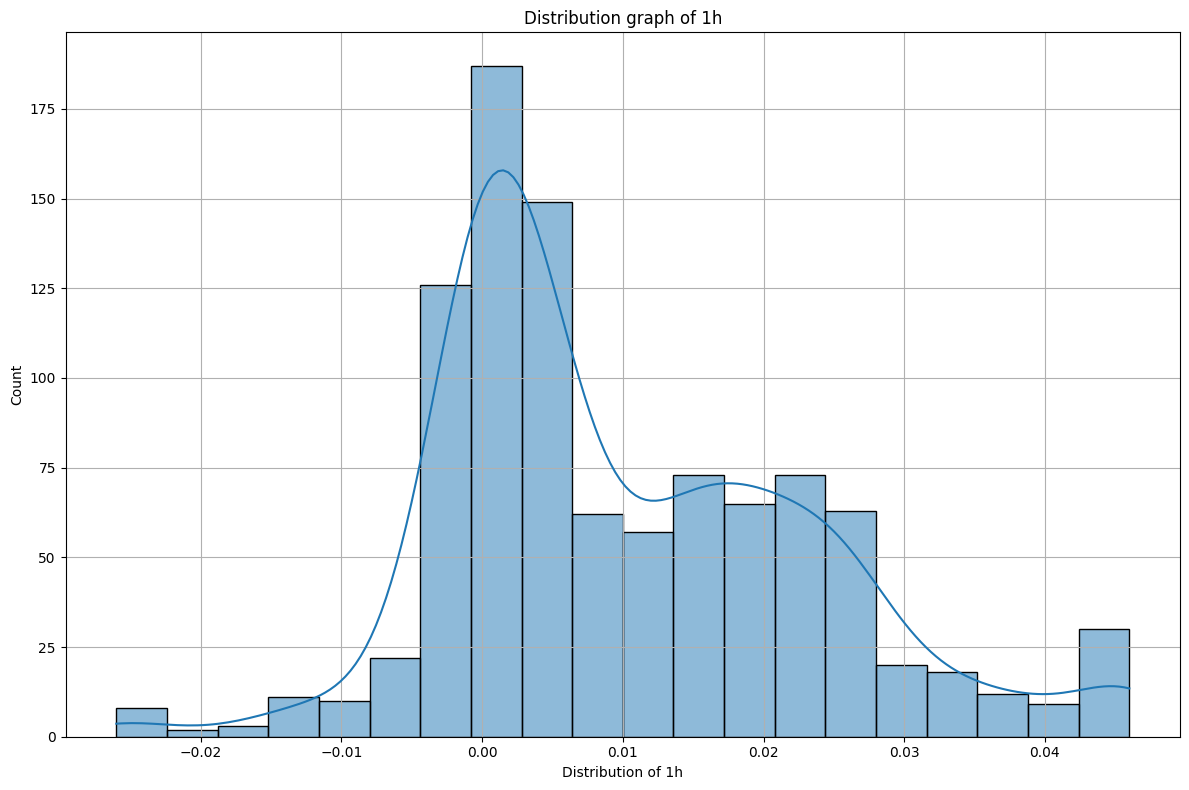

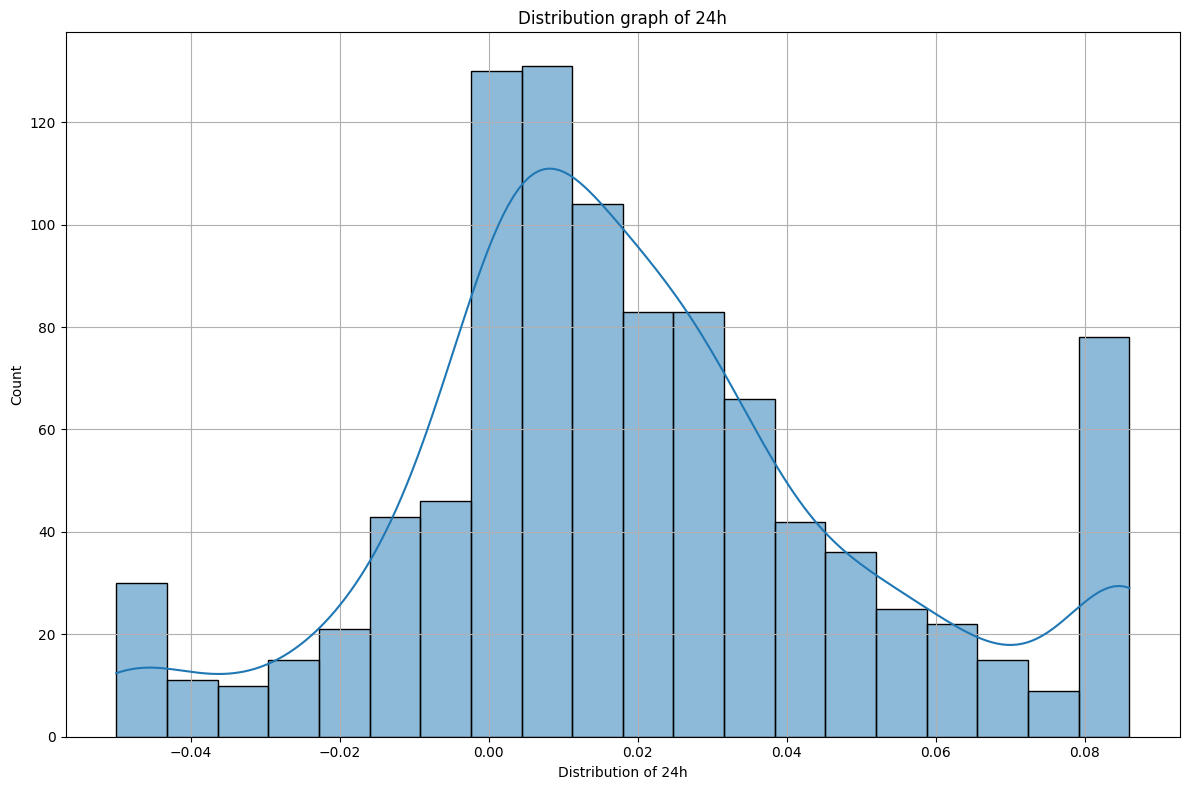

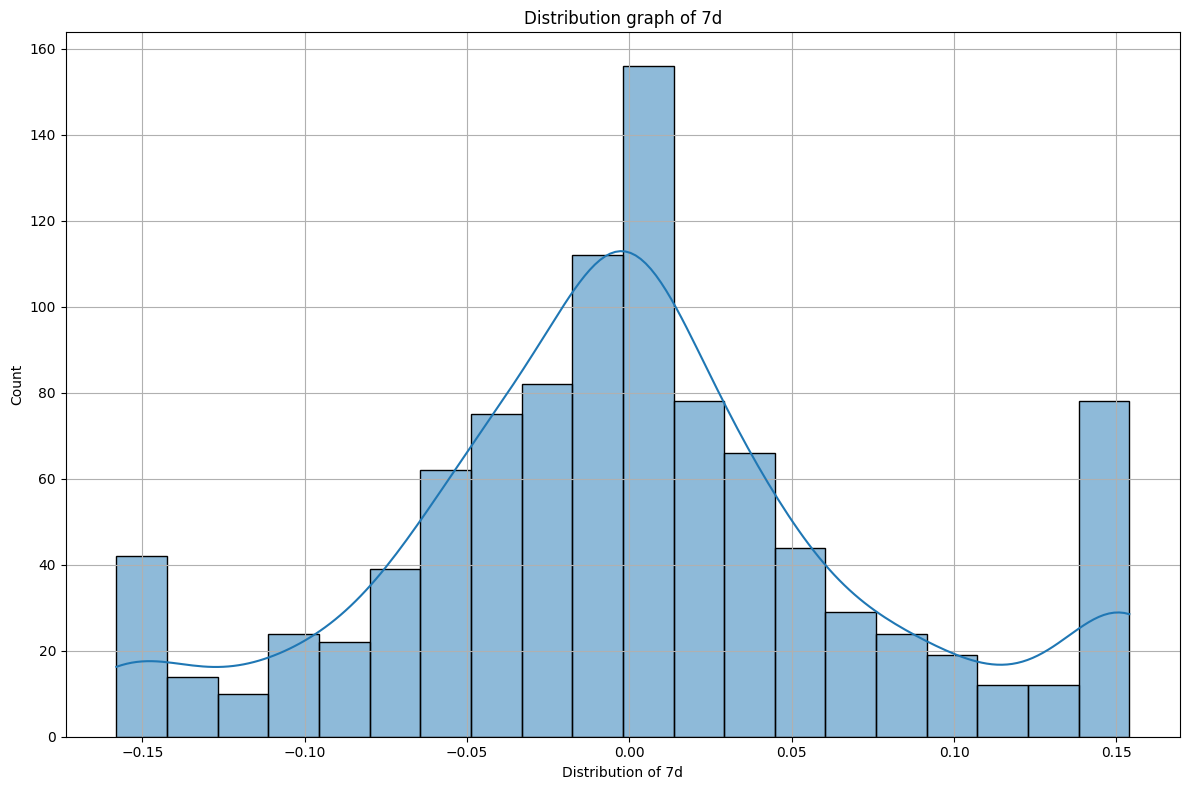

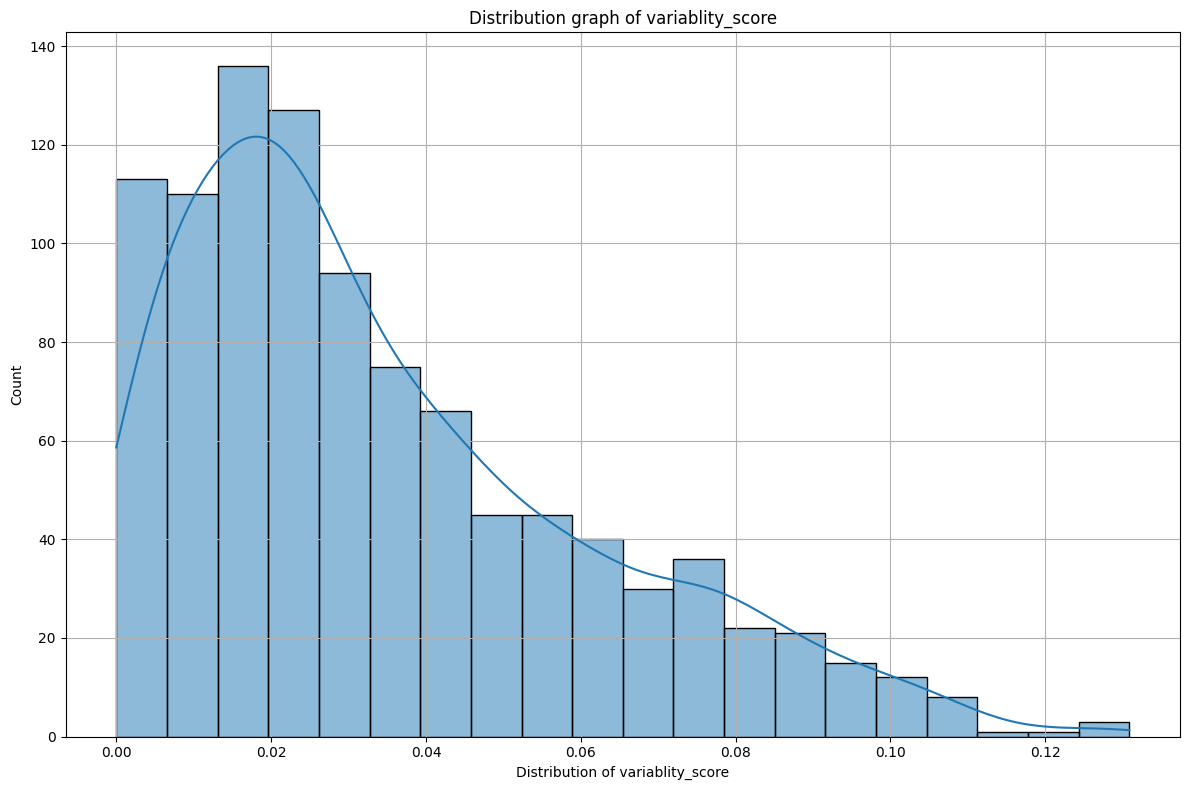

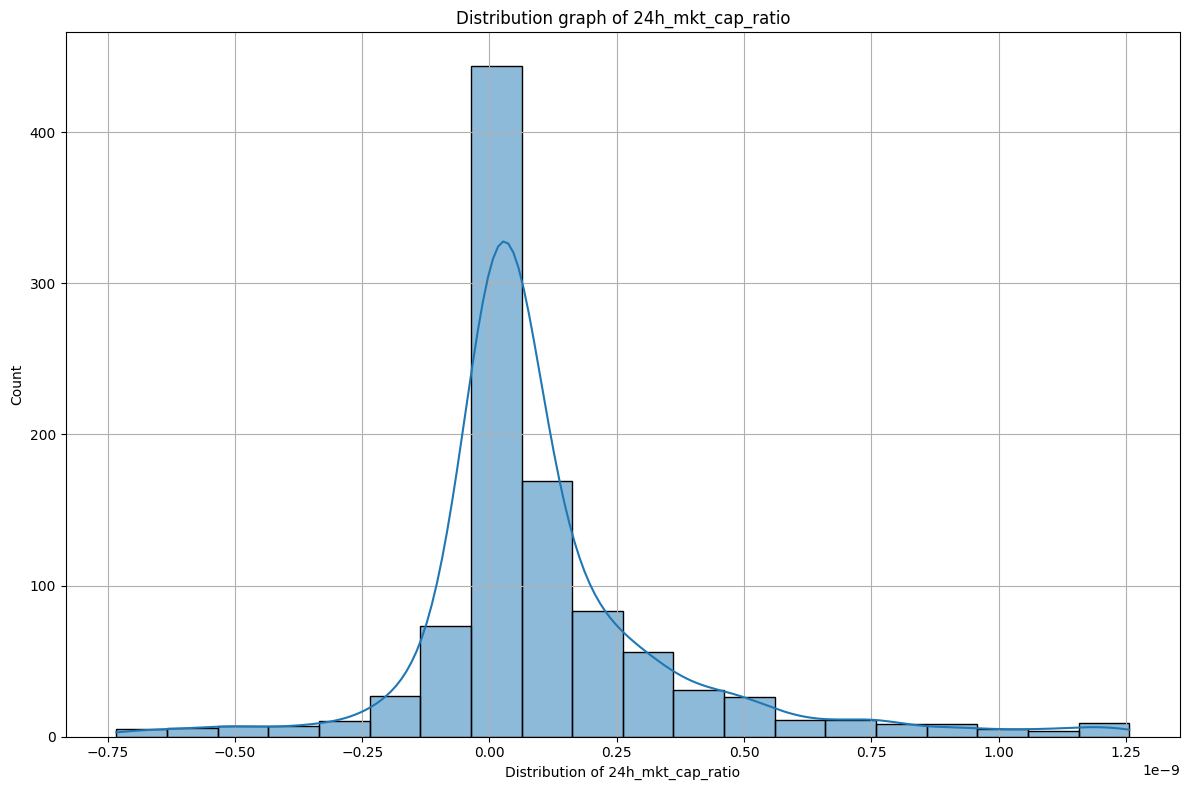

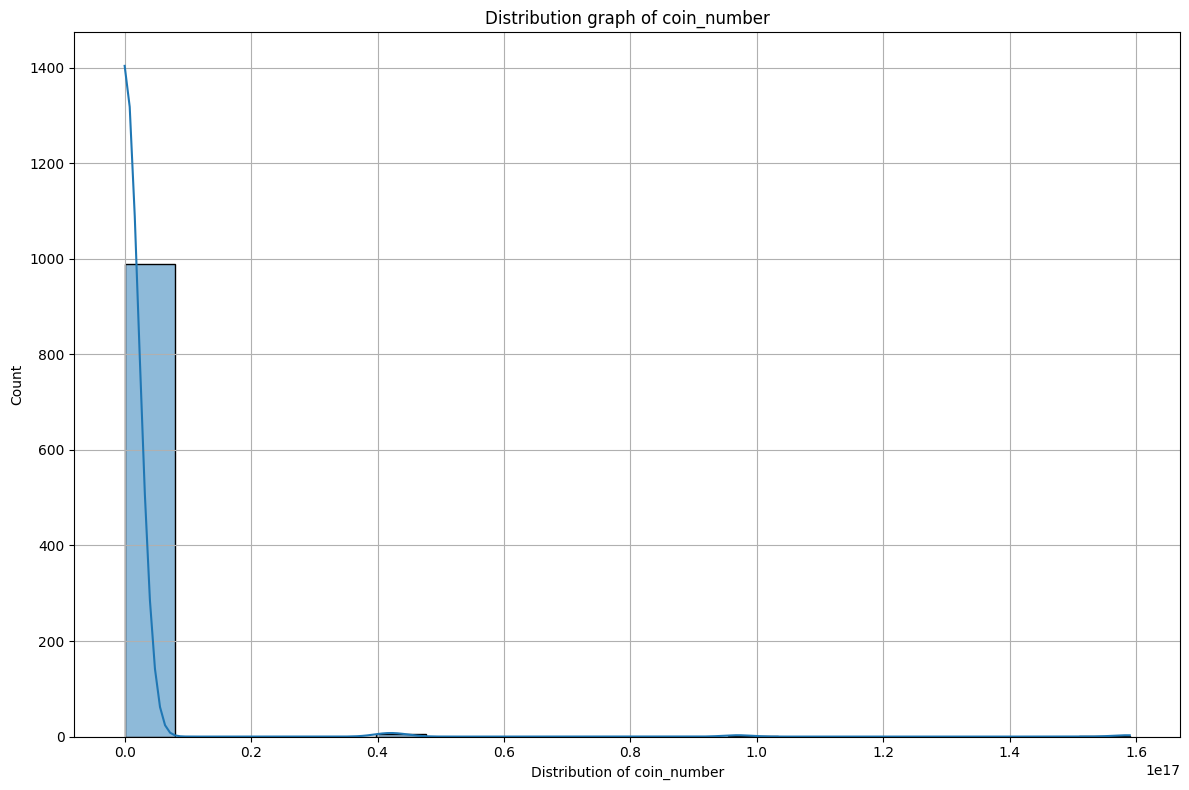

In [13]:
name = df.columns
for i in name:
    plt.figure(figsize=(12,8))
    sns.histplot(df[i],bins=20,kde=True)
    plt.grid(which='both')
    plt.xticks(minor=True)
    plt.xlabel(f'Distribution of {i}')
    plt.ylabel('Count')
    plt.title(f'Distribution graph of {i}')
    plt.tight_layout()
    plt.show()


Findings of Univariate Analysis:
Distribution graph of '1_h', '24_hr' and '7_days' is almost like bell shaped (normally distributed) rest other distributions graphs i.e. 'coin_number', 'variablity_score' and 'price' are right skewed which indicates that it needs scaling before ingestion in Machine learning algorithm.

In [14]:
df.drop(columns=['price'],axis=1,inplace=True)

In [15]:
df.drop('coin_number',axis=1,inplace=True)

In [16]:
X = df.drop('24h_mkt_cap_ratio',axis=1)

In [17]:
Y = df['24h_mkt_cap_ratio']

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3,random_state=42)

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()

In [22]:
X_train =scaler.fit_transform(X_train)

In [23]:
X_test = scaler.transform(X_test)

In [24]:
from sklearn.ensemble import RandomForestRegressor

In [25]:
RF_model = RandomForestRegressor(n_estimators=200, criterion='squared_error',max_depth=10)

In [26]:
RF_model.fit(X_train,Y_train)

RandomForestRegressor(max_depth=10, n_estimators=200)

In [27]:
Y_train_pred = RF_model.predict(X_train)

In [28]:
from sklearn.metrics import root_mean_squared_error,mean_absolute_error,r2_score

In [29]:
print(f'root mean sqaured error is {root_mean_squared_error(Y_train,Y_train_pred)}')
print(f'mean absolute error is {mean_absolute_error(Y_train,Y_train_pred)}')
print(f'r2_score is {r2_score(Y_train,Y_train_pred)}')

root mean sqaured error is 2.572812344102768e-10
mean absolute error is 1.6634479167444957e-10
r2_score is -3.7747082805461574e-05


In [30]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'reg_alpha': [0, 0.1, 0.5, 1],
    'reg_lambda': [1, 1.5, 2, 3]
}

In [31]:
model = RandomForestRegressor()

In [32]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300,400],
    'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
    'max_depth': [3, 4, 5, 6,7],
    
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv = 5, n_jobs = -1, verbose=3)
grid_search
grid_search.fit(X_train, Y_train)
grid_search.best_params_
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)

# Evaluate the tuned model
print("Tuned model performance:")
print(f"R2 score: {r2_score(Y_test, y_pred_tuned)}")

Fitting 5 folds for each of 80 candidates, totalling 400 fits
Tuned model performance:
R2 score: 0.5165539847161049


In [36]:
import pickle

In [37]:
with open('Random_Forest_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)
